<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers

In [2]:
(train_ds, validate_ds, test_ds), data_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteROI10O/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [4]:
print(len(train_ds))
print(len(validate_ds))
print(len(test_ds))

18610
2326
2326


In [5]:
num_classes = data_info.features['label'].num_classes
print(num_classes)

2


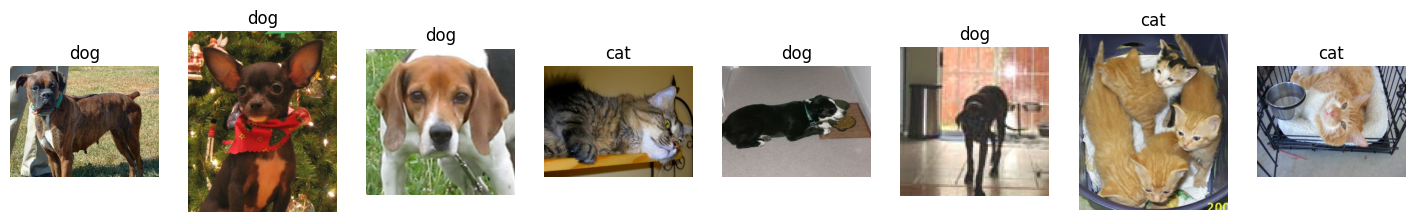

In [8]:
get_label_name = data_info.features['label'].int2str
train_iter = iter(train_ds)
fig = plt.figure(figsize=(18, 8))
for x in range(8):
  image, label = next(train_iter)
  fig.add_subplot(1, 8, x+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(get_label_name(label));

(375, 500, 3)
(180, 180, 3)


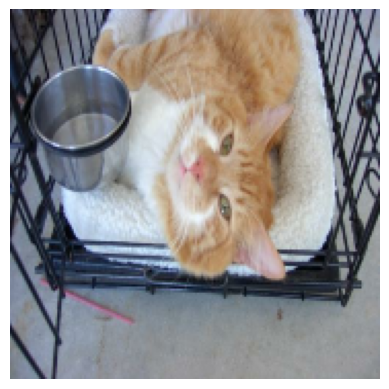

In [10]:
IMG_SIZE = 180

print(image.shape)

resize_and_rescale = keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

result = resize_and_rescale(image)
plt.axis('off')
plt.imshow(result);

print(result.shape)

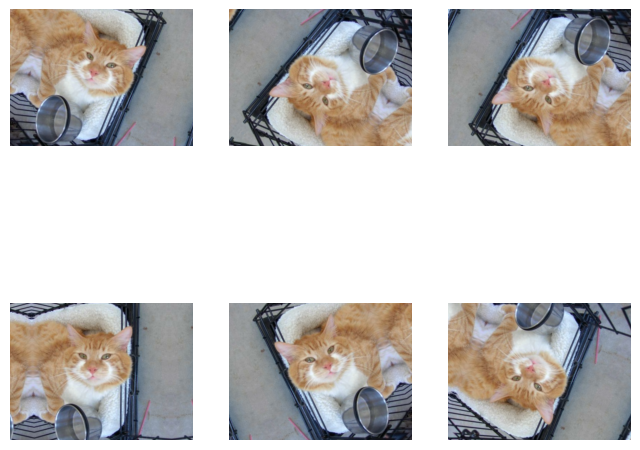

In [11]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])


plt.figure(figsize=(8, 7))
for i in range(6):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

In [12]:
model = keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  # Add the model layers
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

In [13]:
aug_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [15]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)


train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(validate_ds)
test_ds = prepare(test_ds)

ValueError: ignored

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# import tensorflow as tf
# import tensorflow_datasets as tfds
# from tensorflow import keras

In [2]:
# dataset = tfds.load('cats_vs_dogs', split='train', shuffle_files=True, as_supervised=True)

# print(len(dataset))

23262


In [3]:
# train_ds = dataset.take(18000)
# test_ds = dataset.skip(18000)

# print(len(train_ds), len(test_ds))

18000 5262


In [4]:
# x_train = []
# y_train = []
# x_test = []
# y_test = []

# for image, label in tfds.as_numpy(train_ds):
#   x_train.append(image)
#   y_train.append(label)

# for image, label in tfds.as_numpy(test_ds):
#   x_test.append(image)
#   y_test.append(label)


# print(type(x_train[0]))
# print(type(x_test[0])) 

# print(len(x_train))
# print(len(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
18000
5262


In [7]:
# print(x_train[0].shape)
# print(x_test[0].shape)

(350, 350, 3)
(480, 374, 3)


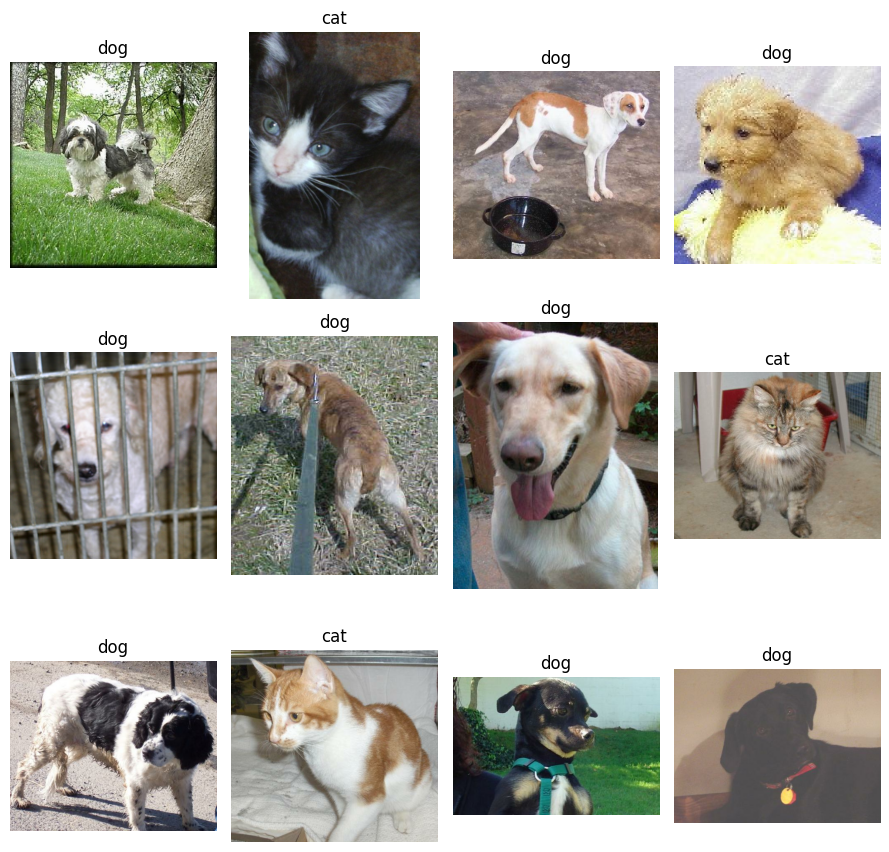

In [5]:
# rows = 3
# cols = 4
# curr_fig = 1
# plt.figure(figsize=(9, 9))
# for i in range(rows):
#   for j in range(cols):
#     plt.subplot(rows, cols, curr_fig)
#     plt.imshow(x_train[curr_fig - 1])
#     plt.title('cat' if y_train[curr_fig - 1] == 0 else 'dog')
#     plt.axis('off')
#     curr_fig += 1
# plt.tight_layout()
# plt.show()    

In [58]:
# model = keras.Sequencial([
    
# ])

<class 'numpy.ndarray'>
<class 'numpy.int64'>


<ipython-input-58-7700b43c3f68>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image, label in train_ds.take(1)
<ipython-input-58-7700b43c3f68>:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  image, label in train_ds.take(1)
